In [ ]:
import TV_TVB_Functions as tvf
import matplotlib.pyplot as plt
import numpy as np
from typing import Sequence, Union, List, Dict
from tvb.simulator.lab import *

Raw data shape: (10000, 1, 4, 1)


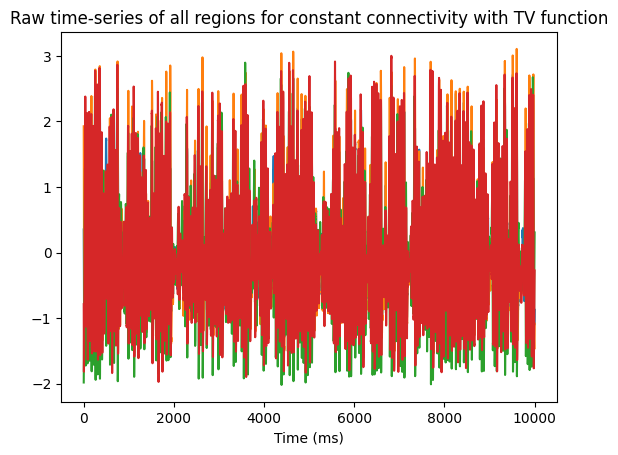

BOLD data shape: (10, 1, 4, 1)


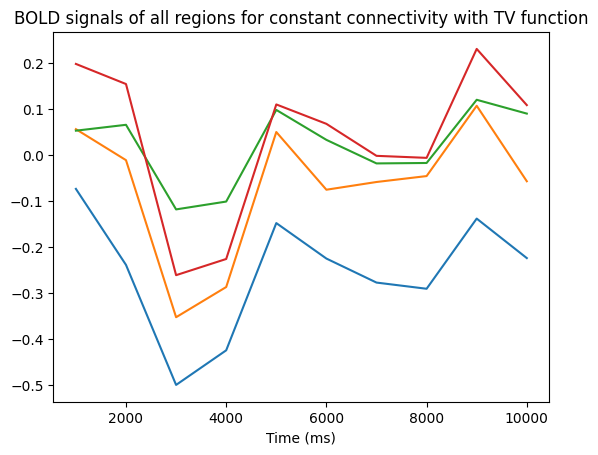

In [85]:
## Case 1: the goal of this objective is to compare this function to the normal simulation

connectivities_constant = np.stack([
        [[ 1,  -2,   3, 6],
         [ 5,  -6,   7, 7],
         [ 9, -10,  11, -12],
         [13, -14,  15, -3]],

        [[ 1,  -2,   3, 6],
         [ 5,  -6,   7, 7],
         [ 9, -10,  11, -12],
         [13, -14,  15, -3]],
    ], axis=2)


slice_duration = 5000.0

# Simple centres and tract_lengths
n_regions = connectivities_constant.shape[0]
centres = np.zeros((n_regions, 3))
tract_lengths = np.ones((n_regions, n_regions))

# Monitor list: raw and bold
monitor_list = (
    monitors.Raw(period=1.0),
    monitors.Bold(period=1000.0),
)

# Run simulation
outputs_constant = tvf.simulate_time_varying_connectivity(
    connectivities=connectivities_constant,
    slice_dur=slice_duration,
    coupling_gain=0.5,
    dt=1.0,
    noise_sigma=0.001,
    monitor_list=monitor_list,
    centres=centres,
    tract_lengths=tract_lengths
)

t_raw_c, data_raw_c = outputs_constant[0]
print("Raw data shape:", data_raw_c.shape) 
plt.figure()
plt.plot(t_raw_c, data_raw_c[:, 0, :, 0])
plt.title('Raw time-series of all regions for constant connectivity with TV function')
plt.xlabel('Time (ms)')
plt.show()

# Unpack and plot second monitor (bold)
t_bold_c, data_bold_c = outputs_constant[1]
print("BOLD data shape:", data_bold_c.shape)
plt.figure()
plt.plot(t_bold_c, data_bold_c[:, 0, :, 0])
plt.title('BOLD signals of all regions for constant connectivity with TV function')
plt.xlabel('Time (ms)')
plt.show()



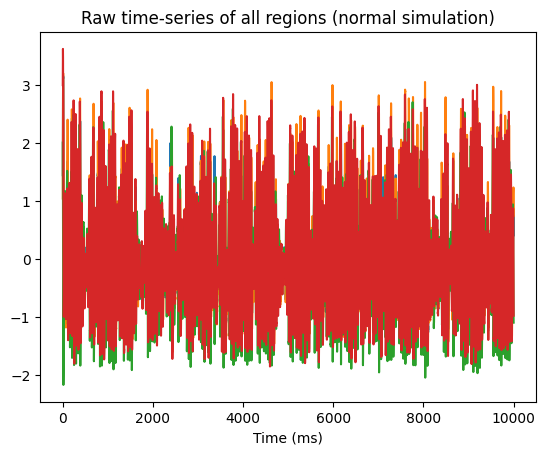

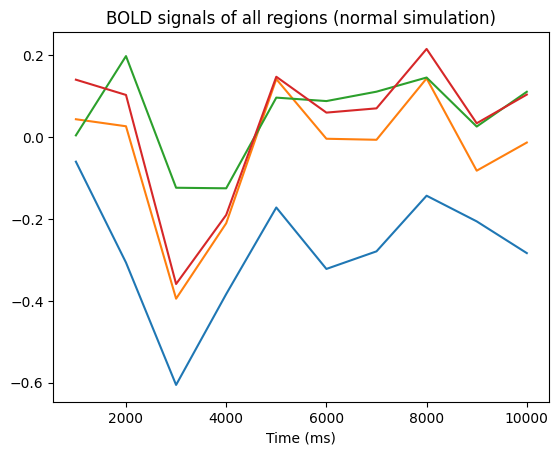

In [23]:
# Case 2: Normal simulation with the same parameters

sim_nominal = simulator.Simulator(
    model        = models.Generic2dOscillator(),
    connectivity = connectivity.Connectivity(
        weights       = connectivities_constant[..., 0],
        tract_lengths = tract_lengths,
        region_labels = np.array([f"R{i+1}" for i in range(n_regions)], dtype="<U128"),
        centres       = centres
    ),
    coupling     = coupling.Linear(a=np.array([0.5])), 
    integrator   = integrators.HeunStochastic(
        dt    = 1.0,
        noise = noise.Additive(nsig=np.array([0.001]), noise_seed=np.random.randint(0, 10000)
    )),
    monitors     = monitor_list,
    simulation_length = 10000.0
)
sim_nominal.configure()

outputs_nom = sim_nominal.run()

t_raw_nom, data_raw_nom = outputs_nom[0]
plt.figure()
plt.plot(t_raw_nom, data_raw_nom[:, 0, :, 0])
plt.title('Raw time-series of all regions (normal simulation)')
plt.xlabel('Time (ms)')
plt.show()

# Unpack and plot second monitor (bold)
t_bold_nom, data_bold_nom = outputs_nom[1]
plt.figure()
plt.plot(t_bold_nom, data_bold_nom[:, 0, :, 0])
plt.title('BOLD signals of all regions (normal simulation)')
plt.xlabel('Time (ms)')
plt.show()

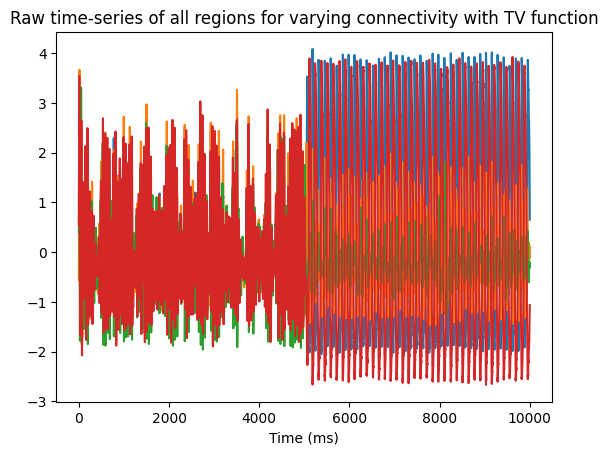

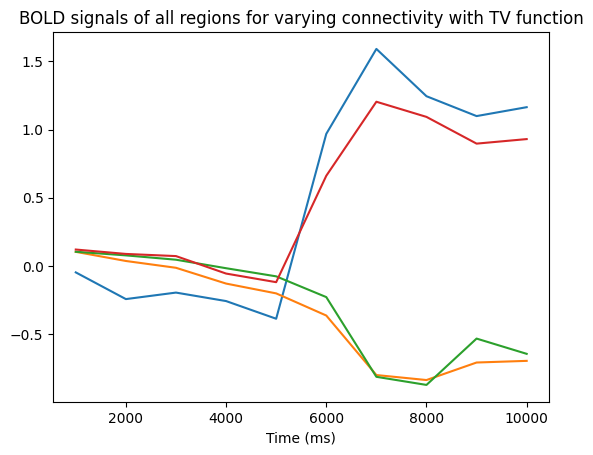

In [24]:
#3 Case 3: Time-varying connectivity simulation as a point of comparison for both constant connectivity simulations above

connectivities_varying = np.stack([
        [[ 1,  -2,   3, 6],
         [ 5,  -6,   7, 7],
         [ 9, -10,  11, -12],
         [13, -14,  15, -3]],

        [[ 10,  8,   4, 2],
         [ -9, -10, -11, -12],
         [ 1,  2, 3, 1],
         [-19, -1,  1, -3]],
    ], axis=2)



# Simple centres and tract_lengths
n_regions = connectivities_varying.shape[0]
centres = np.zeros((n_regions, 3))
tract_lengths = np.ones((n_regions, n_regions))
slice_duration = 5000.0

# Monitor list: raw and bold
monitor_list = (
    monitors.Raw(period=1.0),
    monitors.Bold(period=1000.0),
)

# Run simulation
outputs_var = tvf.simulate_time_varying_connectivity(
    connectivities=connectivities_varying,
    slice_dur=slice_duration,
    coupling_gain=0.5,
    dt=1.0,
    noise_sigma=0.001,
    monitor_list=monitor_list,
    centres=centres,
    tract_lengths=tract_lengths
)

t_raw_var, data_raw_var = outputs_var[0]
plt.figure()
plt.plot(t_raw_var, data_raw_var[:, 0, :, 0])
plt.title('Raw time-series of all regions for varying connectivity with TV function')
plt.xlabel('Time (ms)')
plt.show()

# Unpack and plot second monitor (bold)
t_bold_var, data_bold_var = outputs_var[1]
plt.figure()
plt.plot(t_bold_var, data_bold_var[:, 0, :, 0])
plt.title('BOLD signals of all regions for varying connectivity with TV function')
plt.xlabel('Time (ms)')
plt.show()

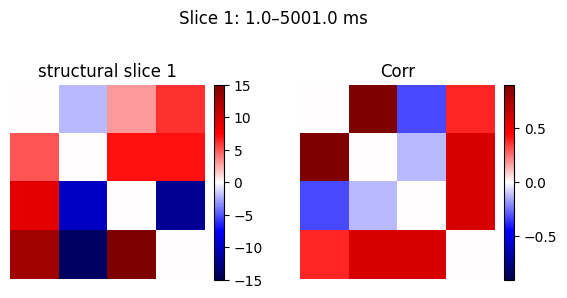

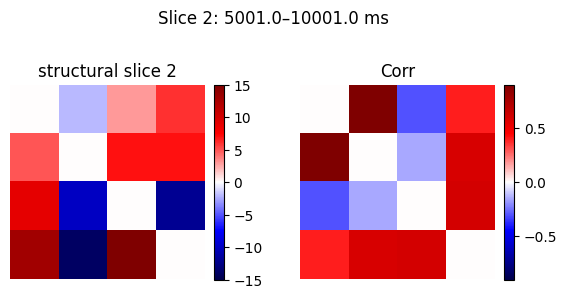

In [25]:
raw_monitor_1 = outputs_constant[0]    

slice_durations_1 = [5000.0, 5000.0]   


tvf.plot_FC_slices(
    raw_monitor_1,
    slice_durations_1,
    structural_slices=connectivities_constant, # structural connectivity for display
    fc_methods = ['Corr']
)

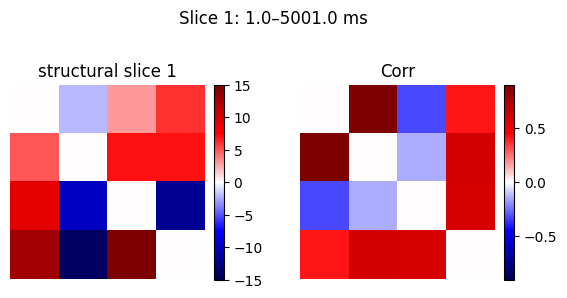

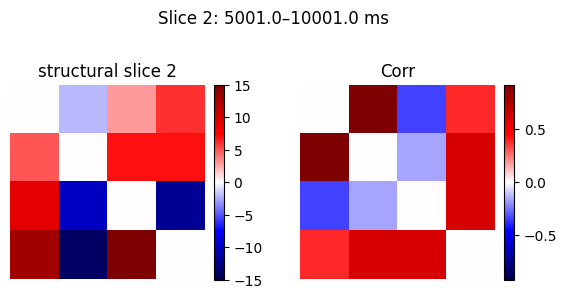

In [26]:
raw_monitor_2 = outputs_nom[0]    

slice_durations_2 = [5000.0, 5000.0]   


tvf.plot_FC_slices(
    raw_monitor_2,
    slice_durations_2,
    structural_slices=connectivities_constant, # structural connectivity for display
    fc_methods = ['Corr']
)

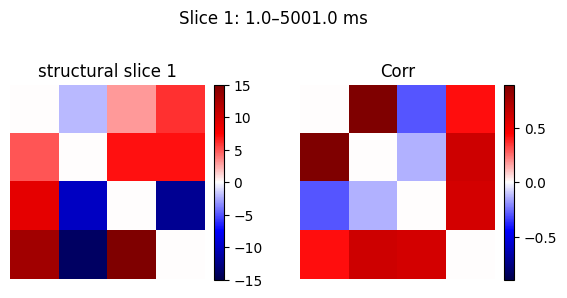

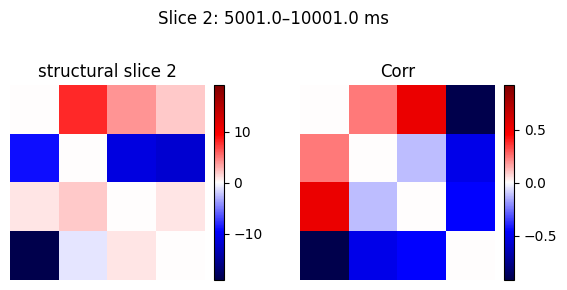

In [27]:
raw_monitor_3 = outputs_var[0]    

slice_durations_3 = [5000.0, 5000.0]   


tvf.plot_FC_slices(
    raw_monitor_3,
    slice_durations_3,
    structural_slices=connectivities_varying, # structural connectivity for display
    fc_methods = ['Corr']
)

In [2]:
## This round of testing is to compare FC in the case of simple graphs.

connectivities_case1 = np.stack([
    
    [[0,1,0,0],
     [0,0,1,0],
     [0,0,0,1],
     [1,0,0,0]],

    [[0,1,0,0],
     [0,0,1,0],
     [0,0,0,1],
     [1,0,0,0]],

    [[0,1,0,0],
     [0,0,1,0],
     [0,0,0,1],
     [1,0,0,0]],
], axis=2)

connectivities_case2 = np.stack([
    
    [[0,1,0,0],   
     [0,0,1,0],  
     [0,0,0,1],  
     [1,0,0,0]],  

    
    [[0,1,0,0],   
     [0,0,2,0],   
     [0,0,0,1],   
     [1,0,0,0]],  

    
    [[0,1,0,0],   
     [0,0,3,0],   
     [0,0,0,1],   
     [1,0,0,0]],  
], axis=2)

connectivities_case3 = np.stack([
    
    [[0,1,0,0],   
     [0,0,1,0],  
     [0,0,0,1],  
     [1,0,0,0]],  

    
    [[0,1,0,0],   
     [0,0,0.1,0],   
     [0,0,0,1],   
     [2,0,0,0]],  

    
    [[0,1,0,0],   
     [0,0,0.01,0],   
     [0,0,0,1],   
     [3,0,0,0]],  
], axis=2)

slice_duration = 10000.0  # ms
monitor_list = (monitors.Raw(period=1.0), monitors.Bold(period=1000.0))
n_regions = 4
centres = np.zeros((n_regions, 3))
tract_lengths = np.ones((n_regions, n_regions))


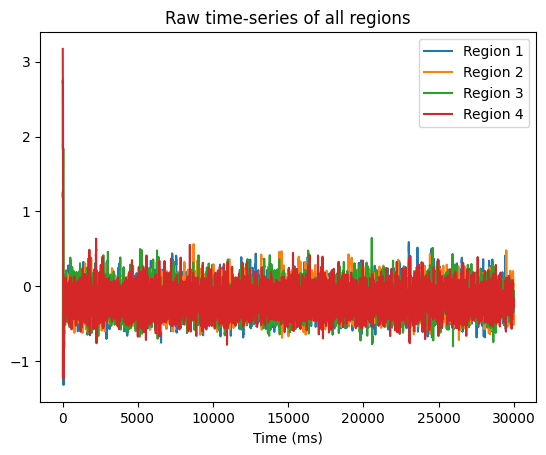

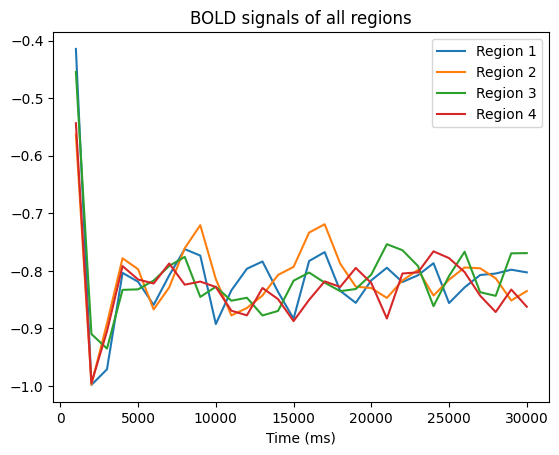

In [3]:
outputs_case1 = tvf.simulate_time_varying_connectivity(
    connectivities=connectivities_case1,
    slice_dur=slice_duration,
    coupling_gain=0.5,
    dt=1.0,
    noise_sigma=0.001,
    monitor_list=monitor_list,
    centres=centres,
    tract_lengths=tract_lengths
)

t_raw_1, data_raw_1 = outputs_case1[0]
plt.figure()
for r in range(n_regions):
    plt.plot(t_raw_1, data_raw_1[:, 0, r, 0], label=f"Region {r+1}")
plt.title('Raw time-series of all regions')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()

t_bold_1, data_bold_1 = outputs_case1[1]
plt.figure()
for r in range(n_regions):
    plt.plot(t_bold_1, data_bold_1[:, 0, r, 0], label=f"Region {r+1}")
plt.title('BOLD signals of all regions')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()


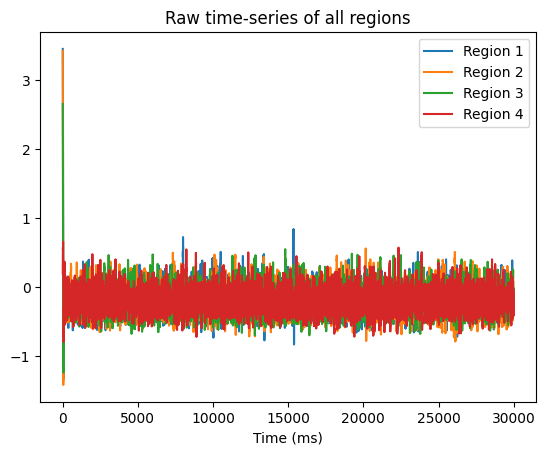

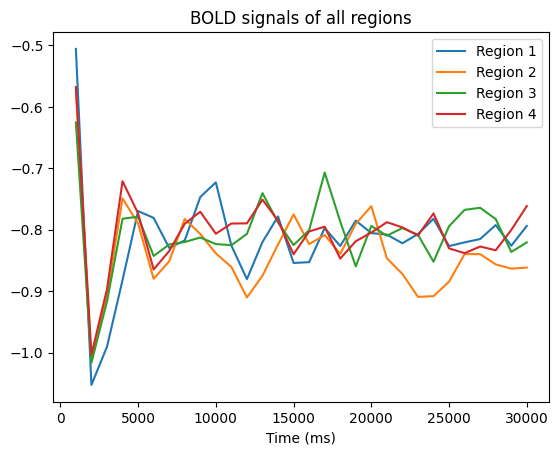

In [4]:
outputs_case2 = tvf.simulate_time_varying_connectivity(
    connectivities=connectivities_case2,
    slice_dur=slice_duration,
    coupling_gain=0.5,
    dt=1.0,
    noise_sigma=0.001,
    monitor_list=monitor_list,
    centres=centres,
    tract_lengths=tract_lengths
)

t_raw_2, data_raw_2 = outputs_case2[0]
plt.figure()
for r in range(n_regions):
    plt.plot(t_raw_2, data_raw_2[:, 0, r, 0], label=f"Region {r+1}")
plt.title('Raw time-series of all regions')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()

t_bold_2, data_bold_2 = outputs_case2[1]
plt.figure()
for r in range(n_regions):
    plt.plot(t_bold_2, data_bold_2[:, 0, r, 0], label=f"Region {r+1}")
plt.title('BOLD signals of all regions')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()


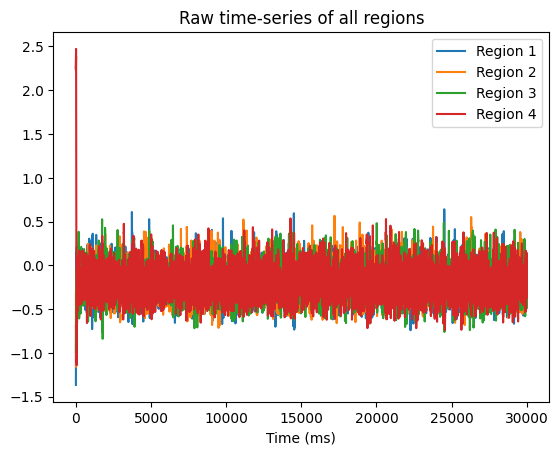

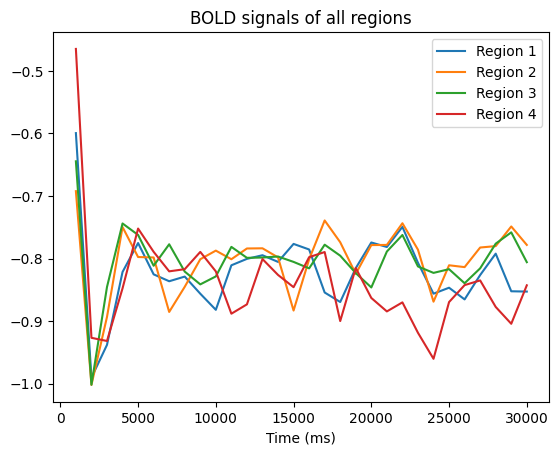

In [5]:
outputs_case3 = tvf.simulate_time_varying_connectivity(
    connectivities=connectivities_case3,
    slice_dur=slice_duration,
    coupling_gain=0.5,
    dt=1.0,
    noise_sigma=0.001,
    monitor_list=monitor_list,
    centres=centres,
    tract_lengths=tract_lengths
)

t_raw_3, data_raw_3 = outputs_case3[0]
plt.figure()
for r in range(n_regions):
    plt.plot(t_raw_3, data_raw_3[:, 0, r, 0], label=f"Region {r+1}")
plt.title('Raw time-series of all regions')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()

t_bold_3, data_bold_3 = outputs_case3[1]
plt.figure()
for r in range(n_regions):
    plt.plot(t_bold_3, data_bold_3[:, 0, r, 0], label=f"Region {r+1}")
plt.title('BOLD signals of all regions')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()


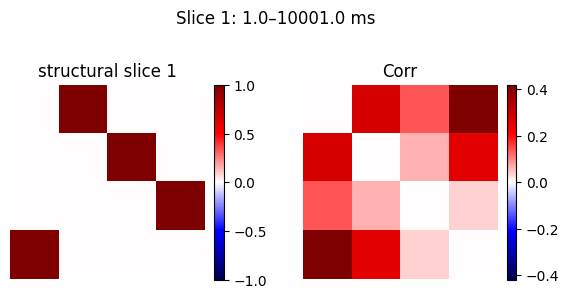

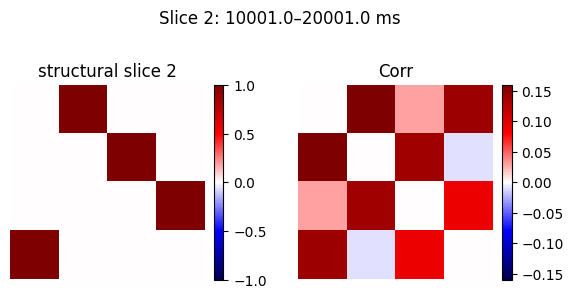

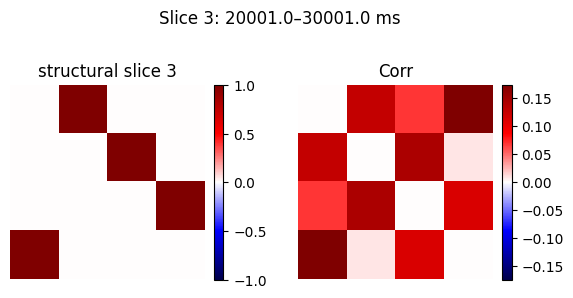

In [6]:
raw_monitor_4 = outputs_case1[0]

slice_durations_cases = [10000.0, 10000.0, 10000.0]

tvf.plot_FC_slices(
    raw_monitor_4,
    slice_durations_cases,
    structural_slices=connectivities_case1, # structural connectivity for display
    fc_methods = ['Corr']
)
